# MNC-KAIST
## (3) DataLoader
### 2021 / 12 / 24
Copyright (C) 2019 Kangyeol Kim kangyeolk@kaist.ac.kr & Sanghyeon Lee shlee6825@kaist.ac.kr

In [2]:
!pip install torchvision

In [3]:
import os
import torch
import argparse
import numpy as np
import torchvision
import torchvision.models as models
import matplotlib.pyplot as plt 
from matplotlib.pyplot import imshow
%matplotlib inline

## [1] 간단한 데이터 다운로드를 위한 pytorch API의 활용

### MNIST 데이터
- 60000 training images 
- 10000 validation images 
- 10 classes = [0,1,2,3,4,5,6,7,8,9]

In [4]:
train_d = torchvision.datasets.MNIST(root = './data', train=True, download=True, transform=torchvision.transforms.ToTensor())
test_d = torchvision.datasets.MNIST(root = './data', train=False, download=True, transform=torchvision.transforms.ToTensor())
train_loader = torch.utils.data.DataLoader(train_d, batch_size=32, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_d, batch_size=32, shuffle=False)

Using downloaded and verified file: ./data\MNIST\raw\train-images-idx3-ubyte.gz
Extracting ./data\MNIST\raw\train-images-idx3-ubyte.gz to ./data\MNIST\raw

Using downloaded and verified file: ./data\MNIST\raw\train-labels-idx1-ubyte.gz
Extracting ./data\MNIST\raw\train-labels-idx1-ubyte.gz to ./data\MNIST\raw

Using downloaded and verified file: ./data\MNIST\raw\t10k-images-idx3-ubyte.gz
Extracting ./data\MNIST\raw\t10k-images-idx3-ubyte.gz to ./data\MNIST\raw

Using downloaded and verified file: ./data\MNIST\raw\t10k-labels-idx1-ubyte.gz
Extracting ./data\MNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\MNIST\raw



In [5]:
print('총 학습 데이터 개수 : %d, 총 테스트 데이터 개수 : %d'%(len(train_d), len(test_d))) 

총 학습 데이터 개수 : 60000, 총 테스트 데이터 개수 : 10000


In [6]:
print('[배치 크기 32 기준] 학습 데이터 배치 개수 : %d, 테스트 데이터 배치 개수 : %d'%(len(train_loader), len(test_loader))) 

[배치 크기 32 기준] 학습 데이터 배치 개수 : 1875, 테스트 데이터 배치 개수 : 313


<ipython-input-7-8c65e40075cf>:10: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


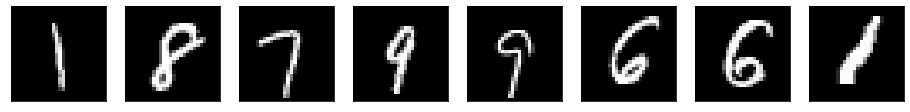

In [7]:
def show_mnist():
    for images, _ in train_loader:
        images_to_show = images.squeeze().numpy()
        fig=plt.figure(figsize=(16, 2))
        for i in range(8):
            fig.add_subplot(1, 8, i+1)
            plt.imshow(images_to_show[i], cmap='gray')
            plt.xticks([])
            plt.yticks([])    
        fig.show()
        break
show_mnist()

### CIFAR-10 데이터
- 50000 training images 
- 10000 validation images 
- 10 classes = [airplane, car, truck, frog, ...]
- for more info, https://www.cs.toronto.edu/~kriz/cifar.html 



In [20]:
train_d = torchvision.datasets.CIFAR10('./data', train=True, download=True, transform=torchvision.transforms.ToTensor())
test_d = torchvision.datasets.CIFAR10('./data', train=False, download=True, transform=torchvision.transforms.ToTensor())
train_loader = torch.utils.data.DataLoader(train_d, batch_size=32, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_d, batch_size=32, shuffle=False)

Files already downloaded and verified
Files already downloaded and verified


In [21]:
print('총 학습 데이터 개수 : %d, 총 테스트 데이터 개수 : %d'%(len(train_d), len(test_d))) 

총 학습 데이터 개수 : 50000, 총 테스트 데이터 개수 : 10000


In [22]:
print('[배치 크기 32 기준] 학습 데이터 배치 개수 : %d, 테스트 데이터 배치 개수 : %d'%(len(train_loader), len(test_loader))) 

[배치 크기 32 기준] 학습 데이터 배치 개수 : 1563, 테스트 데이터 배치 개수 : 313


<ipython-input-23-99dae6bc08dc>:10: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


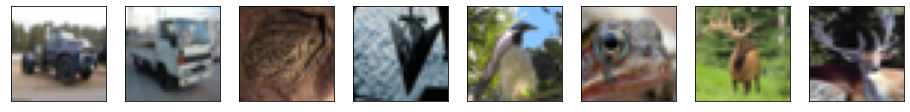

In [23]:
def show_image(loader, fig_num=8):
    for images, _ in loader:
        images_to_show = images.numpy().transpose((0,2,3,1))
        fig=plt.figure(figsize=(16, 5))
        for i in range(fig_num):
            fig.add_subplot(1, fig_num, i+1)
            plt.imshow(images_to_show[i])
            plt.xticks([])
            plt.yticks([])    
        fig.show()
        break
show_image(train_loader)

## [2] Pytorch ImageFolder를 통해 손쉽게 데이터로더 만들기

In [24]:
import os 
if not os.path.exists('./data/minidata/train'):
    os.makedirs ('./data/minidata/train')
    os.makedirs ('./data/minidata/val')

train_d = torchvision.datasets.ImageFolder('./data/minidata/train',transform=torchvision.transforms.ToTensor())                        
test_d = torchvision.datasets.ImageFolder('./data/minidata/val',transform=torchvision.transforms.ToTensor())
train_loader = torch.utils.data.DataLoader(train_d, batch_size=10, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_d, batch_size=10, shuffle=False)

In [25]:
print('총 학습 데이터 개수 : %d, 총 테스트 데이터 개수 : %d'%(len(train_d), len(test_d))) 

총 학습 데이터 개수 : 20, 총 테스트 데이터 개수 : 6


In [26]:
print('[배치 크기 32 기준] 학습 데이터 배치 개수 : %d, 테스트 데이터 배치 개수 : %d'%(len(train_loader), len(test_loader))) 

[배치 크기 32 기준] 학습 데이터 배치 개수 : 2, 테스트 데이터 배치 개수 : 1


In [27]:
# 에러가 예측됩니다. 사진 사이즈가 다양하기 때문입니다.
# Batch * H * W * C
for images, _ in train_loader:
    print(images)
    break

RuntimeError: stack expects each tensor to be equal size, but got [3, 359, 512] at entry 0 and [3, 458, 600] at entry 1

In [28]:
# 서로 다른 사이즈의 이미지를 받아오기 위해서는 전처리를 해줘야 합니다.
# 많은 이미지를 가지고 있다고 할 때 이것들을 일괄적으로 해결해주는 것이 쉽지 않습니다.
# transforms함수는 이를 한방에 처리해줍니다.
transform=torchvision.transforms.Compose([
                                # Resize로 사진의 크기 통일
                              torchvision.transforms.Resize((224, 224)), 
                              torchvision.transforms.ToTensor(),                                           
                              ])  
                            
train_d = torchvision.datasets.ImageFolder('./data/minidata/train',transform=transform)                       
train_loader = torch.utils.data.DataLoader(train_d, batch_size=10, shuffle=False)

<ipython-input-23-99dae6bc08dc>:10: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


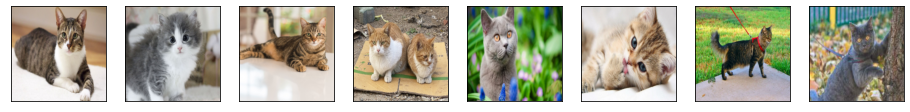

In [29]:
show_image(train_loader)

In [30]:
# 큰 사진의 경우 이를 cropping해서 사용한다면 데이터 증대의 효과를 누릴 수 있습니다.
transform=torchvision.transforms.Compose([
                                # RandomResizedCrop: 랜덤의 위치에서 (H, W) 사이즈로 자름
                              torchvision.transforms.RandomResizedCrop((224, 224)),
                              torchvision.transforms.ToTensor(),                                           
                              ])  
                            
train_d = torchvision.datasets.ImageFolder('./data/minidata/train',transform=transform)                       
train_loader = torch.utils.data.DataLoader(train_d, batch_size=10, shuffle=False)

<ipython-input-23-99dae6bc08dc>:10: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


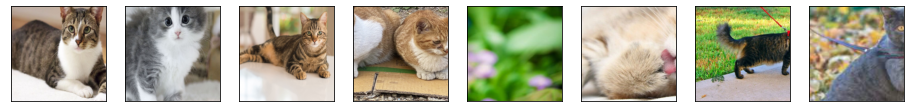

In [31]:
show_image(train_loader)

In [32]:
# 풍경 사진의 경우에는 어색할 수 있으나, 자연의 다양한 사진은 flipping이나 rotation을 해도 어색하지 않으며, 
#이 또한 데이터 증대의 효과를 가집니다. 
transform=torchvision.transforms.Compose([
                                # RandomRotation: 랜덤 회전 
                                # RandomHorizontalFlip: 랜덤 좌우반전
                                # RandomVerticalFlip: 랜덤 상하반전 
                              torchvision.transforms.RandomResizedCrop((224, 224)),
                              torchvision.transforms.RandomRotation((-180, 180)),
                              torchvision.transforms.RandomHorizontalFlip(),
                              torchvision.transforms.RandomVerticalFlip(),
                              torchvision.transforms.ToTensor(),                                
                              ])  
                            
train_d = torchvision.datasets.ImageFolder('./data/minidata/train',transform=transform)                       
train_loader = torch.utils.data.DataLoader(train_d, batch_size=10, shuffle=False)

<ipython-input-23-99dae6bc08dc>:10: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


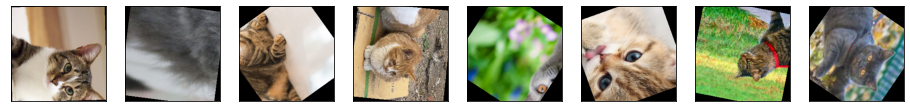

In [33]:
show_image(train_loader)

In [34]:
# 한 가지 이미지 데이터를 다룰 때 주의할 점: normalize는 필수!!
# 하나의 사진 데이터가 가지는 평균을 0으로, 표준편차를 1로 맞춰줌으로써 더욱 generalizable한 성능을 기대합니다 
transform=torchvision.transforms.Compose([
                              torchvision.transforms.RandomResizedCrop((224, 224)),
                              torchvision.transforms.ToTensor(),                   
                              ])  
                            
train_d = torchvision.datasets.ImageFolder('./data/minidata/train',transform=transform)                       
train_loader = torch.utils.data.DataLoader(train_d, batch_size=10, shuffle=False)

In [35]:
# 데이터가 적기에 img 자체가 모든 학습 데이터를 가지고 있습니다. 여기서 평균과 표준편차을 구해줍니다.
for img,_ in train_loader:
    ave = torch.stack([img[:,0].mean(),img[:,1].mean(),img[:,2].mean()])
    standard = torch.stack([img[:,0].std(),img[:,1].std(),img[:,2].std()])
print(ave.tolist())
print(standard.tolist())

[0.5819116234779358, 0.5203925967216492, 0.4410589039325714]
[0.2938990592956543, 0.28747332096099854, 0.3021600544452667]


In [37]:
# 구해준 평균과 표준편차를 사용하여 이미지를 normalize해줍니다.
transform=torchvision.transforms.Compose([
                              torchvision.transforms.RandomResizedCrop((224, 224)),
                              torchvision.transforms.ToTensor(),
                              torchvision.transforms.Normalize(mean=ave.tolist(),std=standard.tolist())

                              ])  
                            
train_d = torchvision.datasets.ImageFolder('./data/minidata/train',transform=transform)   
test_d = torchvision.datasets.ImageFolder('./data/minidata/val',transform=transform)                       

train_loader = torch.utils.data.DataLoader(train_d, batch_size=10, shuffle=False)
test_loader= torch.utils.data.DataLoader(test_d, batch_size=10, shuffle=False)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
<ipython-input-23-99dae6bc08dc>:10: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, 

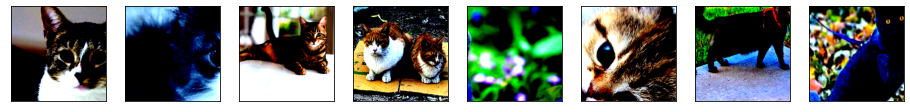

In [38]:
# 사진의 범위가 안 맞기에 색이 변색되어보이고 에러 문자가 뜹니다. 제대로 프린트해주기 위해서는
# 사진을 다시 표준편차를 곱하고 평균을 더하는 작업을 해줘야 합니다.
show_image(train_loader)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
<ipython-input-23-99dae6bc08dc>:10: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


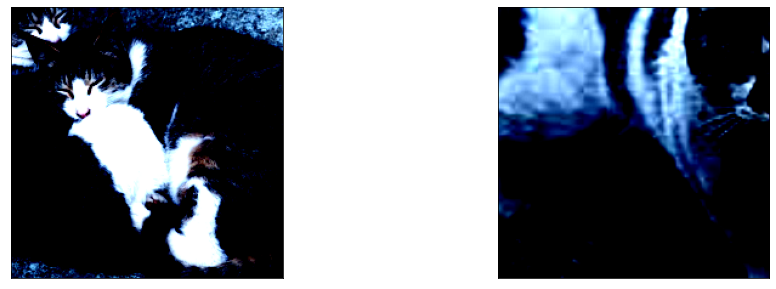

In [39]:
show_image(test_loader, fig_num=2)

## [3] Custom 데이터 로드 만들기

In [40]:
def show_image2(loader, fig_num=8):
    for images, _, _ in loader:
        images_to_show = images.numpy().transpose((0,2,3,1))
        fig=plt.figure(figsize=(16, 5))
        for i in range(fig_num):
            fig.add_subplot(1, fig_num, i+1)
            plt.imshow(images_to_show[i])
            plt.xticks([])
            plt.yticks([])    
        fig.show()
        break

In [41]:
# Custom Dataloader 를 만들어 봅시다.
from torchvision import datasets
from torch.utils.data import Dataset
from torchvision import datasets, transforms

from PIL import Image
import os
from glob import glob

# Dataloader는 기본적으로 아래와 같은 형식으로 작성합니다. 

class CustomeImageDataset(Dataset):
    # 생성자 정의
    def __init__(self, ):
        pass
    # len 함수에 의해 호출됨, __iter__나 __getitem__을 호출해서 IndexError 가 나올 떄 까지 for loop를 제공함
    def __len__(self, ):
        pass
    
    #  슬라이싱을 구현할 수 있도록 돕는 메소드
    def __getitem__(self, ):
        pass
    
# print(len(myclass))

In [42]:
class CustomNumbers:
    def __init__(self):
        self._numbers = [n for n in range(1, 11)] # [1, 2, 3, 4, 5, ..., 10]

a = CustomNumbers()
a._numbers[2:5]
# [3, 4, 5]


[3, 4, 5]

In [46]:
class CustomNumbers:
    def __init__(self):
        self._numbers = [n for n in range(1, 11)]
        self._numbers2 = [3 * n for n in range(1, 11)]

    def __getitem__(self, idx):
        # return self._numbers[idx]
        return self._numbers2[idx]

a = CustomNumbers()
a[2:7]
# [3, 4, 5, 6, 7]


[9, 12, 15, 18, 21]

In [47]:
class CustomNumbers:
    def __init__(self):
        self._numbers = [n for n in range(1, 11)]

    def __len__(self):
        return len(self._numbers) # return len(image)

    def __getitem__(self, idx):
        return self._numbers[idx]

a = CustomNumbers()
for i in a:
    print(i)
# [3, 4, 5, 6, 7]


1
2
3
4
5
6
7
8
9
10


```

In [50]:
# glob: 데이터 뽑기
glob('./data/minidata/train/*/*')

['./data/minidata/train\\cat\\201904291390027161_3.jpg',
 './data/minidata/train\\cat\\2047160_528296_3416.png',
 './data/minidata/train\\cat\\45454aa.jpg',
 './data/minidata/train\\cat\\68033_61662_5258.jpg',
 './data/minidata/train\\cat\\cat1.jpg',
 './data/minidata/train\\cat\\cattac.jpg',
 './data/minidata/train\\cat\\images (1)1.jpg',
 './data/minidata/train\\cat\\images343.jpg',
 './data/minidata/train\\cat\\walking-cat.jpg',
 './data/minidata/train\\cat\\_103218321_gettyimages-134815902.jpg',
 './data/minidata/train\\dog\\193887_98886_128.png',
 './data/minidata/train\\dog\\2-38.jpg',
 './data/minidata/train\\dog\\20191120501989.jpg',
 './data/minidata/train\\dog\\808641_838604_148.jpg',
 './data/minidata/train\\dog\\dog11.jpg',
 './data/minidata/train\\dog\\ererrere.jpg',
 './data/minidata/train\\dog\\imagesrre.jpg',
 './data/minidata/train\\dog\\qx2w21ds114o5i19bv7g.jpg',
 './data/minidata/train\\dog\\ttaatta.jpg',
 './data/minidata/train\\dog\\unnamed.jpg']

In [53]:
import numpy as np

torch.Tensor(np.array(Image.open('./data/minidata/train/dog/unnamed.jpg'))).shape

torch.Size([359, 512, 3])

In [55]:
text = './data/minidata/train/dog'
text.split('/')[-1]

'dog'

```

In [58]:
# 원하는 Image 와 label 그리고 name 을 반환하는 Dataset을 만들어 봅시다. 

class CustomeImageDataset(Dataset):
    def __init__(self, train_dir = './data/minidata/train', image_size = 64):
        self.train_dir = train_dir
        self.train_data = glob(os.path.join(self.train_dir, '*', '*'))
        self.transform = transforms.Compose([transforms.Resize((image_size,image_size)),
                                             transforms.ToTensor(),
                                             ])
    def __len__(self):
        return len(self.train_data)
    
    def __getitem__(self, index):
        image = Image.open(self.train_data[index]).convert('RGB')
        image = self.transform(image)
        print(self.train_data[index])
        
        image_name = self.train_data[index].split('\\')[-1] # Window
        # image_name = self.train_data[index].split('/')[-1] # Linux

        if self.train_data[index].split('\\')[-2] == 'cat': # Window
        # if self.train_data[index].split('/')[-2] == 'cat':

            label = 0
        elif self.train_data[index].split('\\')[-2] =='dog': # Window
        # elif self.train_data[index].split('/')[-2] =='dog': # Linux

            label = 1
        return image, label, image_name

    
    
mydataset = CustomeImageDataset()
print('Dataset의 개수',len(mydataset))
img_, label_, name_ = mydataset[1]

Dataset의 개수 20
./data/minidata/train\cat\2047160_528296_3416.png


In [59]:
print(img_.shape,)
print(label_)
print(name_)

torch.Size([3, 64, 64])
0
2047160_528296_3416.png


./data/minidata/train\cat\201904291390027161_3.jpg


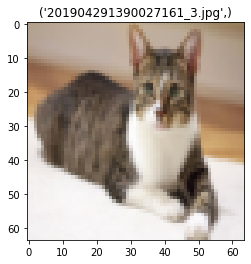

Class: 0


In [60]:
# 데이터를 확인해 봅시다 !
image, label, name = next(iter(torch.utils.data.DataLoader(mydataset, batch_size=1, shuffle=False)))
im = plt.imshow(image[0].permute(1,2,0))
plt.title(name)
plt.show()
plt.close()
print('Class:', label.item())

./data/minidata/train\cat\201904291390027161_3.jpg
./data/minidata/train\cat\2047160_528296_3416.png
./data/minidata/train\cat\45454aa.jpg
./data/minidata/train\cat\68033_61662_5258.jpg
./data/minidata/train\cat\cat1.jpg
./data/minidata/train\cat\cattac.jpg
./data/minidata/train\cat\images (1)1.jpg
./data/minidata/train\cat\images343.jpg
./data/minidata/train\cat\walking-cat.jpg
./data/minidata/train\cat\_103218321_gettyimages-134815902.jpg


<ipython-input-40-48d183401010>:10: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


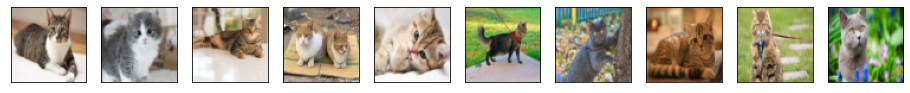

In [61]:
# Test DataLoader를 만들어 봅시다. 
train_loader = torch.utils.data.DataLoader(mydataset, batch_size=10, shuffle=False)
show_image2(train_loader, fig_num=10)

In [62]:
# DataLoader 사용법 
for batch, (image, label, name) in enumerate(train_loader):
    print(batch, name)
    break
    

./data/minidata/train\cat\201904291390027161_3.jpg
./data/minidata/train\cat\2047160_528296_3416.png
./data/minidata/train\cat\45454aa.jpg
./data/minidata/train\cat\68033_61662_5258.jpg
./data/minidata/train\cat\cat1.jpg
./data/minidata/train\cat\cattac.jpg
./data/minidata/train\cat\images (1)1.jpg
./data/minidata/train\cat\images343.jpg
./data/minidata/train\cat\walking-cat.jpg
./data/minidata/train\cat\_103218321_gettyimages-134815902.jpg
0 ('201904291390027161_3.jpg', '2047160_528296_3416.png', '45454aa.jpg', '68033_61662_5258.jpg', 'cat1.jpg', 'cattac.jpg', 'images (1)1.jpg', 'images343.jpg', 'walking-cat.jpg', '_103218321_gettyimages-134815902.jpg')


### DataLoader를 짜는 건 굉장히 중요하니 잘 숙지해 두자!